In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
palette = sns.color_palette("mako")

In [2]:
df = pd.read_csv('uganda_stockist_sale_transactions.csv')
df.head()

,sale_date,saletransaction_id,product_name,product_id,depot_name,unit_cost,unit_price,region_name,manufacturer_name,category_name,product_type,price_type,depot_county_name
0,2022-03-01 05:06:23 UTC,71485110,Sukumawiki,309834,Gang Pur 001,6000.0,7000.0,Northern Region - UG,East African Seed Company Ltd.,Seeds,50g,Retail,Gulu
1,2022-03-01 05:06:23 UTC,71485111,Sulban,309755,Gang Pur 001,4800.0,6000.0,Northern Region - UG,Osho Chemical Industries Ltd.,insecticide,100ml,Retail,Gulu
2,2022-03-01 05:06:23 UTC,71485109,Dudu Acelamectin,184656,Gang Pur 001,4000.0,5000.0,Northern Region - UG,Bukoola Chemicals Industries Ltd.,Agrochemicals,100ml,Retail,Gulu
3,2022-03-01 05:06:23 UTC,71485108,Mancozeb,309785,Gang Pur 001,4500.0,5000.0,Northern Region - UG,East African Seed Company Ltd.,Fungicide,250g,Retail,Gulu
4,2022-03-01 05:36:11 UTC,69584206,Bazoka,245297,Tropical Farm Supplies limited,7500.0,10000.0,Northern Region - UG,Naseco,Seed,1kg,Retail,Apac


In [7]:
categories = ['Agrochemicals', 'Equipment', 'Feeds', 'Fertilizers', 'Hygiene', 'Minerals and Supplements', 'Seeds', 'Services', 'Veterinary Products']
df = df[df['category_name'].isin(categories)]
df.reset_index(drop = True)
df['category_name'].unique()

array(['Seeds', 'Agrochemicals', 'Veterinary Products', 'Fertilizers',
       'Feeds', 'Equipment', 'Minerals and Supplements', 'Hygiene'],
      dtype=object)

In [ ]:
# df['category_name'] = df['category_name'].replace(['AGROCHEMICALS', 'acaricide', 'insecticide', 'Dip', 'spray', 'insecticides', 'fungicide', 'pesticide',
#                                                       'herbicide', 'Agrochemical', 'insectcide', 'pesticides', 'Insecticide', 'Insecticides', 'Acaricides', 'Fungicide', 'Herbicide', ''], 'Agrochemicals')
# df['category_name'] = df['category_name'].replace(
#     ['foliar fertilizer', 'Fertilizer', 'Fertilizerjoje'], 'Fertilizers')
# df['category_name'] = df['category_name'].replace(
#     ['feeds', 'FEEDS', 'Feeds.'], 'Feeds')
# df['category_name'] = df['category_name'].replace(
#     ['Seed', 'seed', 'DH 04 Seeds', 'Vegetable Seeds', 'Cereal Seeds'], 'Seeds')
# df['category_name'] = df['category_name'].replace(
#     ['laxatives', 'vaccines', 'DEWORMERS', 'vertinary product', 'VETERINARY PRODUCTS', 'HVAC', 'tablet', 'vaccine', 'dewormer', ], 'Veterinary Products')
# df['category_name'] = df['category_name'].replace(
#     ['Seed', 'sprayer', 'farm tools', 'pump', 'Tools and Equipment', 'farm equipment', 'syringes'], 'Equipment')
# df['category_name'] = df['category_name'].replace(
#     ['preservatives', 'health'], 'Health')
# df['category_name'] = df['category_name'].replace(
#     ['Accessories', 'oral', 'Antiseptics and Disinfectants', 'poultry', ''], 'Other')
# df['category_name'].unique().tolist()


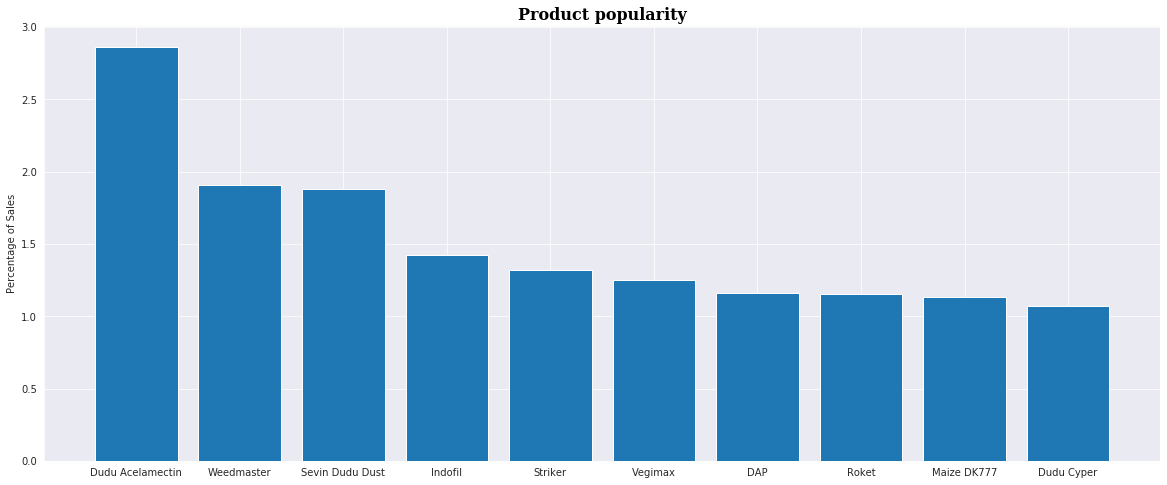

In [8]:
# product popularity
counts = df['product_name'].value_counts()
percentages = (counts/counts.sum()) *100
prod_pop_df = pd.DataFrame({
              'Counts': counts,
              'Percentages': percentages})
top_10_prod = prod_pop_df.sort_values(by='Percentages', ascending=False)[:10]

_=plt.bar(top_10_prod.index, top_10_prod['Percentages'], )
_=plt.title('Product popularity', fontweight='bold', fontsize=16, color='black', fontfamily='serif')
_=plt.ylabel('Percentage of Sales')
_=plt.gcf().set_size_inches(20,8)


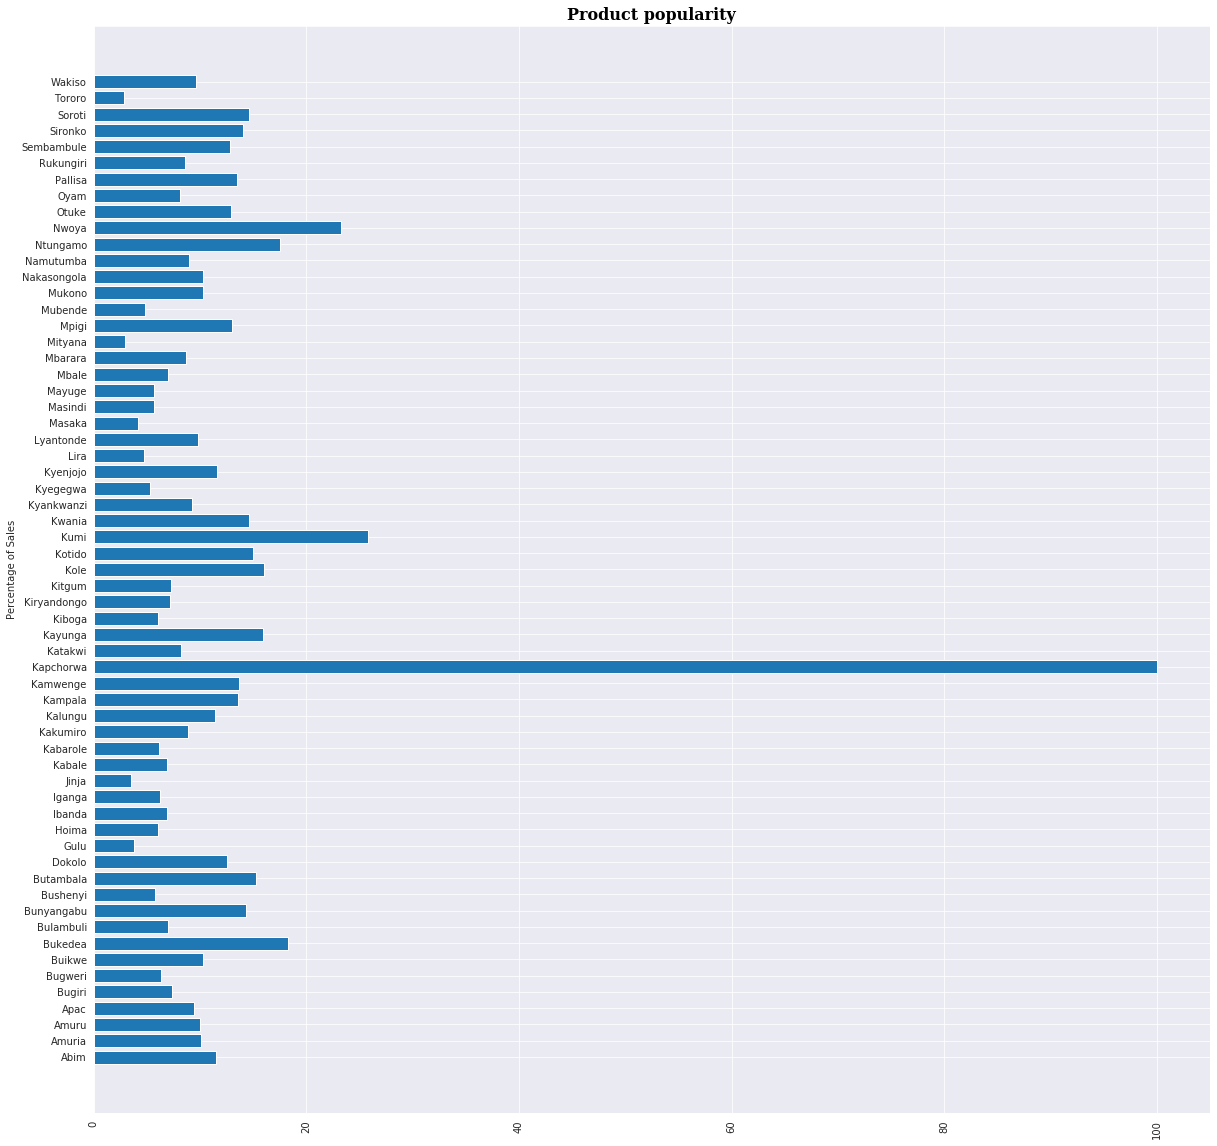

In [30]:
_=df.groupby('depot_county_name')['product_name'].value_counts()
most_common_prod = _.groupby('depot_county_name').head(1)
common_df = pd.DataFrame(most_common_prod)
common_df.rename(columns = {'product_name': 'product_count'}, inplace=True)
common_df.reset_index(inplace=True)
new = pd.DataFrame(df['depot_county_name'].value_counts()).reset_index().sort_values(by = 'index', ascending = True)
new.rename(columns = {'index': 'depot_county_name', 'depot_county_name': 'total'}, inplace=True)
most_common_prod_df = pd.merge(common_df, new, on='depot_county_name')
most_common_prod_df['proportion'] = round((most_common_prod_df['product_count'] / most_common_prod_df['total']) * 100, 1)
most_common_prod_df

_=plt.barh(most_common_prod_df.depot_county_name, most_common_prod_df.proportion)
_=plt.title('Product popularity', fontweight='bold', fontsize=16, color='black', fontfamily='serif')
_=plt.ylabel('Percentage of Sales')
_=plt.tick_params(axis='x', labelrotation=90)
_=plt.gcf().set_size_inches(20,20)

,manufacturer_name
Bukoola Chemicals Industries Ltd.,112586
Jubaili Agrotec Ltd.,42596
Osho Chemical Industries Ltd.,30915
East African Seed Company Ltd.,26172
Norbrook Kenya Ltd.,25295
HighChem Essentials Ltd.,15938
Cosmos Ltd.,12572
Export Trading Group,10093
Monsanto,7662
Medisel (K) Ltd.,5851


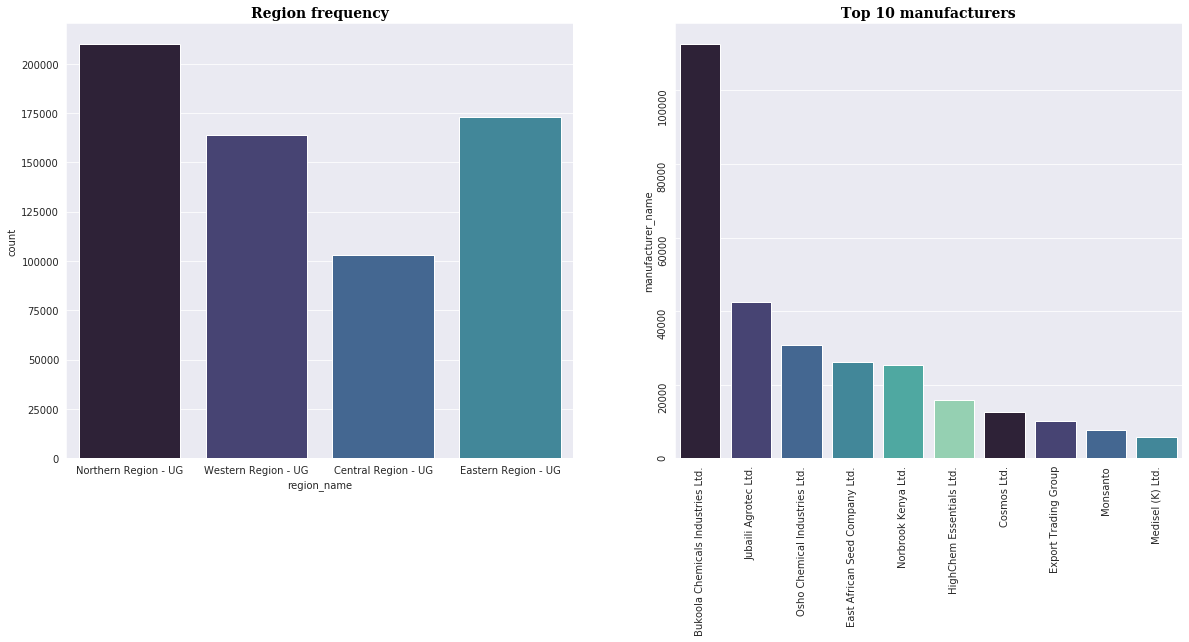

In [38]:
manuf = df['manufacturer_name'].value_counts()[:10].to_frame()
fig, (ax1, ax2) = plt.subplots(1,2)
_ = sns.countplot(x = df['region_name'], palette= palette, ax = ax1)
ax1.set_title('Region frequency', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
_ = sns.barplot(manuf.index, manuf['manufacturer_name'], palette= palette, ax = ax2)
ax2.set_title('Top 10 manufacturers', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
ax2.tick_params(rotation = 90)
plt.gcf().set_size_inches(20,8)

In [51]:
# # creating dataframes to be visualized
Bukoola = df[df['manufacturer_name'] == 'Bukoola Chemicals Industries Ltd.']
Bukoola = Bukoola['product_name'].value_counts()[:5].to_frame()

Jubaili = df[df['manufacturer_name'] == 'Jubaili Agrotec Ltd.']
Jubaili = Jubaili['product_name'].value_counts()[:5].to_frame()

Osho = df[df['manufacturer_name'] == 'Osho Chemical Industries Ltd.']
Osho = Osho['product_name'].value_counts()[:5].to_frame()

Norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
Norbrook = Norbrook['product_name'].value_counts()[:5].to_frame()

EASC = df[df['manufacturer_name'] == 'East African Seed Company Ltd.']
EASC = EASC['product_name'].value_counts()[:5].to_frame()

# # generating the figure and axes
# fig, axs = plt.subplots(5, 1, figsize = (20,20))
# # fig.subplots_adjust(hspace = .5, wspace=.1)
# fig.suptitle('Manufacturers vs Products', fontweight='bold', fontsize=18, color='black', fontfamily='serif')
# axs = axs.ravel()

# # creating the list of dfs to be plotted
# list_dfs = [Bukoola, Jubaili, Osho, Norbrook, EASC]

# # plotting the data
# for n, df in enumerate(list_dfs):
#     sns.barplot(x = df.index, y = df['product_name'], palette= palette, ax = axs[n])
#     axs[n].set_title('Top 5 Products', fontweight='bold', fontsize=12, color='black', fontfamily='serif')
#     plt.axis('off')

KeyError: 'manufacturer_name'

In [42]:
norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
norbrook = norbrook['product_name'].value_counts()[:5].to_frame()
norbrook

,product_name
Sypertix,3751
Albafas 2.5%,3123
Albafas 10%,2691
Norotraz 12.5%,2464
Duodip,2373


Sypertix                  3751
Albafas 2.5%              3123
Albafas 10%               2691
Norotraz 12.5%            2464
Duodip                    2373
Levafas Diamond           1793
Duodip 55%                1563
Norotraz                   872
Milking Salve              756
Norbrook Milking Salve     671
Name: product_name, dtype: int64

Vegimax                   2118
Baraka F1 - Cabbage       1862
Uthane                    1048
Assorted EA Seeds          700
Longe 5 - Maize            692
Hand Sprayer - 1lt         653
Winner 72                  651
KH maize                   537
yellow bag                 535
Sukari F1 - Watermelon     508
Name: product_name, dtype: int64

In [19]:
_=df.groupby('region_name')['manufacturer_name'].value_counts()
most_common_manuf = _.groupby('region_name').head()
manuf_by_region = pd.DataFrame(most_common_manuf)
manuf_by_region.rename(columns = {'manufacturer_name': 'count'}, inplace=True)
manuf_by_region

count
region_name          manufacturer_name                       
Central Region - UG  Bukoola Chemicals Industries Ltd.  24240
                     Norbrook Kenya Ltd.                 8749
                     Jubaili Agrotec Ltd.                5425
                     Nsanja                              3943
                     Osho Chemical Industries Ltd.       3114
Eastern Region - UG  Bukoola Chemicals Industries Ltd.  25945
                     East African Seed Company Ltd.      8721
                     Jubaili Agrotec Ltd.                7969
                     HighChem Essentials Ltd.            7964
                     Osho Chemical Industries Ltd.       7248
Northern Region - UG Bukoola Chemicals Industries Ltd.  27911
                     Jubaili Agrotec Ltd.               19538
                     East African Seed Company Ltd.     10238
                     Osho Chemical Industries Ltd.      10025
                     Monsanto                            6624
Western Region - UG  Bukoola Chemicals Industries Ltd.  34490
                     Osho Chemical Industries Ltd.      10528
                     Jubaili Agrotec Ltd.                9664
                     Norbrook Kenya Ltd.                 8021
                     East African Seed Company Ltd.      6346

In [20]:
_=df.groupby('region_name')['category_name'].value_counts()
most_common_categ = _.groupby('region_name').head()
categ_by_region = pd.DataFrame(most_common_categ)
categ_by_region.rename(columns = {'category_name': 'count'}, inplace=True)
categ_by_region

count
region_name          category_name                  
Central Region - UG  Agrochemicals             54115
                     Veterinary Products       24977
                     Fertilizers                8323
                     Seeds                      6789
                     Minerals and Supplements   4344
Eastern Region - UG  Agrochemicals             65884
                     Fertilizers               26974
                     Veterinary Products       24434
                     Seeds                     24101
                     Feeds                     13107
Northern Region - UG Agrochemicals             95895
                     Seeds                     46105
                     Veterinary Products       33042
                     Fertilizers               16674
                     Equipment                 10154
Western Region - UG  Agrochemicals             97003
                     Veterinary Products       31638
                     Feeds                     11927
                     Seeds                      8120
                     Fertilizers                6913

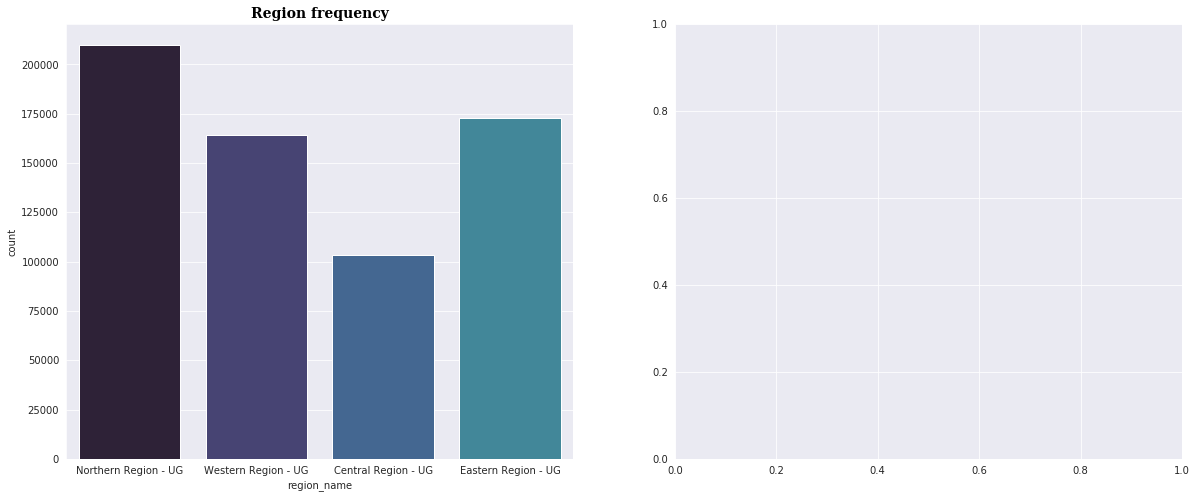

In [40]:
df['product_name'].nunique()

9183

In [ ]:
main_products = []